<a href="https://colab.research.google.com/github/AmitSingh-Rajjput/Machine-Learning-Selfmade-Guide-/blob/main/DBSCAN_Outliner_Identifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0, 0.5, 'Spending')

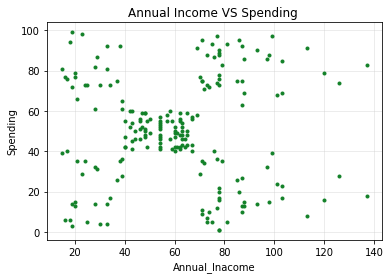

In [7]:
plt.plot(data['Annual Income (k$)'],data['Spending Score (1-100)'],marker='.'
        , linewidth=0,color='#128128')
plt.grid(color='#cccccc',alpha=0.45)
plt.title('Annual Income VS Spending ')
plt.xlabel('Annual_Inacome')
plt.ylabel('Spending')

In [8]:
X = data.iloc[:, [3, 4]].values
dbscan=DBSCAN(eps=3,min_samples=4)
# Fitting the model
model=dbscan.fit(X)
model

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [18]:
outliers_df=data[model.labels_==-1]
cluster_df=data[model.labels_ != -1]
colors=model.labels_
colors_cluster=colors[colors != -1]
color_outliers='black'
#For count how many cluster
clusters=Counter(model.labels_)
print(clusters)
print('Number of Cluster={}'.format(len(clusters)-1)) 



Counter({-1: 121, 2: 28, 1: 15, 0: 10, 4: 6, 3: 4, 5: 4, 6: 4, 7: 4, 8: 4})
Number of Cluster=9


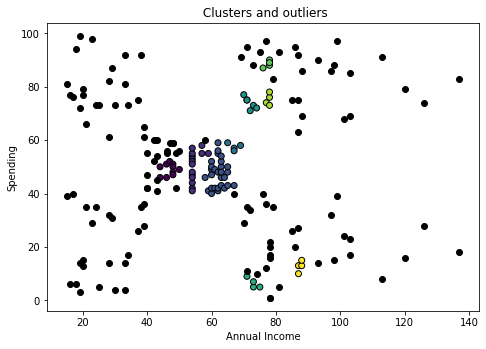

In [23]:
# Plot clusters and outliners
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
ax.scatter(cluster_df['Annual Income (k$)'],cluster_df['Spending Score (1-100)'],
           c=colors_cluster,edgecolors='black')
ax.scatter(outliers_df['Annual Income (k$)'],outliers_df['Spending Score (1-100)'],
           c=color_outliers,edgecolors='black')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Spending')
plt.title(' Clusters and outliers')
plt.show()